## Importar librerías

In [1]:
import janitor
import nhanes.load
import numpy as np
import pandas as pd
import missingno
import seaborn as sns

## Importar funciones personalizadas

In [2]:
%run ../handling_missing_data/utils/pandas-missing-extension.py

## Cargar los datos de NHANES

https://wwwn.cdc.gov/nchs/nhanes/tutorials/default.aspx

In [3]:
nhames_raw_df = (
    nhanes.load.load_NHANES_data(year='2017-2018')
    .clean_names(case_type = "snake")
)

nhames_raw_df.shape

(8366, 197)

## Procesar los datos de NHANES

In [4]:
nhanes_df = (
    nhames_raw_df
    .select_columns(
        'general_health_condition',
        'age_in_years_at_screening',
        'gender',
        'current_selfreported_height_inches',
        'current_selfreported_weight_pounds',
        'doctor_told_you_have_diabetes',
        '60_sec_pulse30_sec_pulse2',
        'total_cholesterol_mgdl'
        )
        .rename_columns(
            {
                "age_in_years_at_screening": 'age',
                "current_selfreported_height_inches": 'height',
                "current_selfreported_weight_pounds": 'weight',
                'doctor_told_you_have_diabetes': 'diabetes',
                '60_sec_pulse30_sec_pulse2': "pulse",
                'total_cholesterol_mgdl': 'cholesterol'
            }
        )
        .replace(
            {
                'height': {
                    9999: np.nan,
                    7777: np.nan
                },
                'weight': {
                    9999: np.nan,
                    7777: np.nan
                },
                'diabetes': {
                    'Borderline': np.nan
                }
            }
        )
        .dropna(
            subset=['diabetes'],
            how='any'
        )
        .transform_column(
            column_name = 'diabetes',
            function = lambda s: s.astype(int),
            elementwise = False
        )
)

## Visualizar los valores faltantes

<AxesSubplot:>

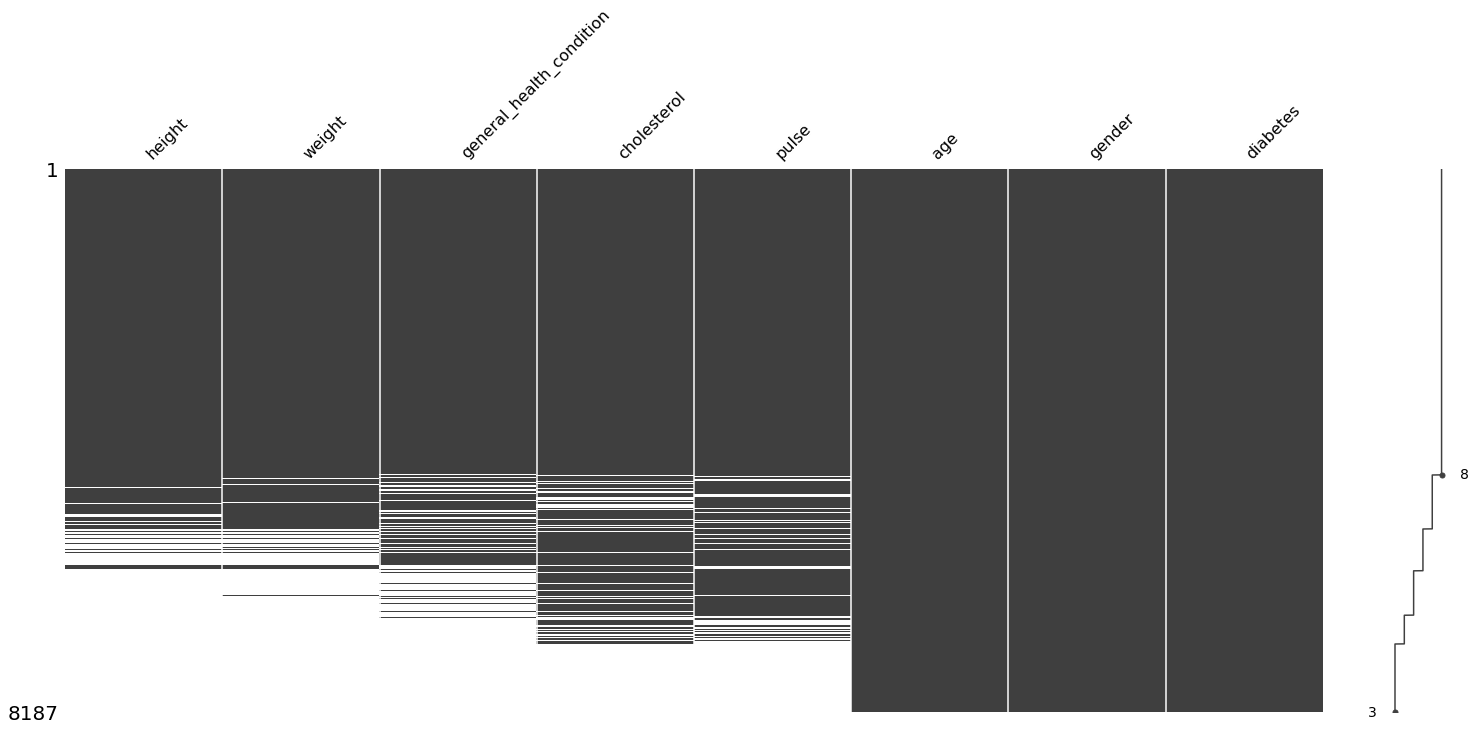

In [5]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix, sort='descending')   
)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

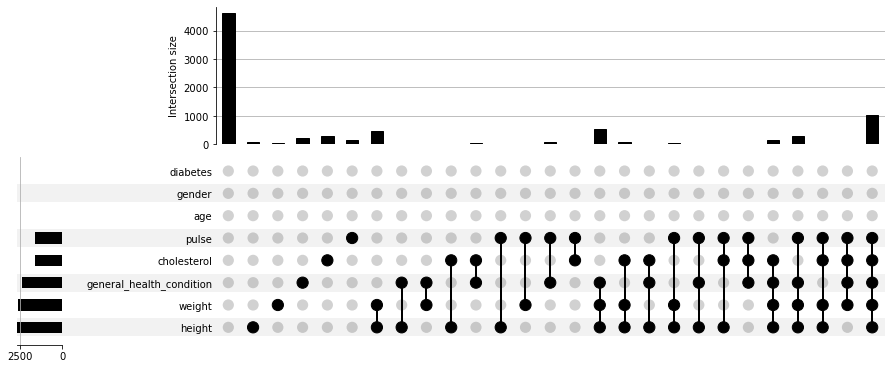

In [6]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .missing.missing_upsetplot()
)

<AxesSubplot:>

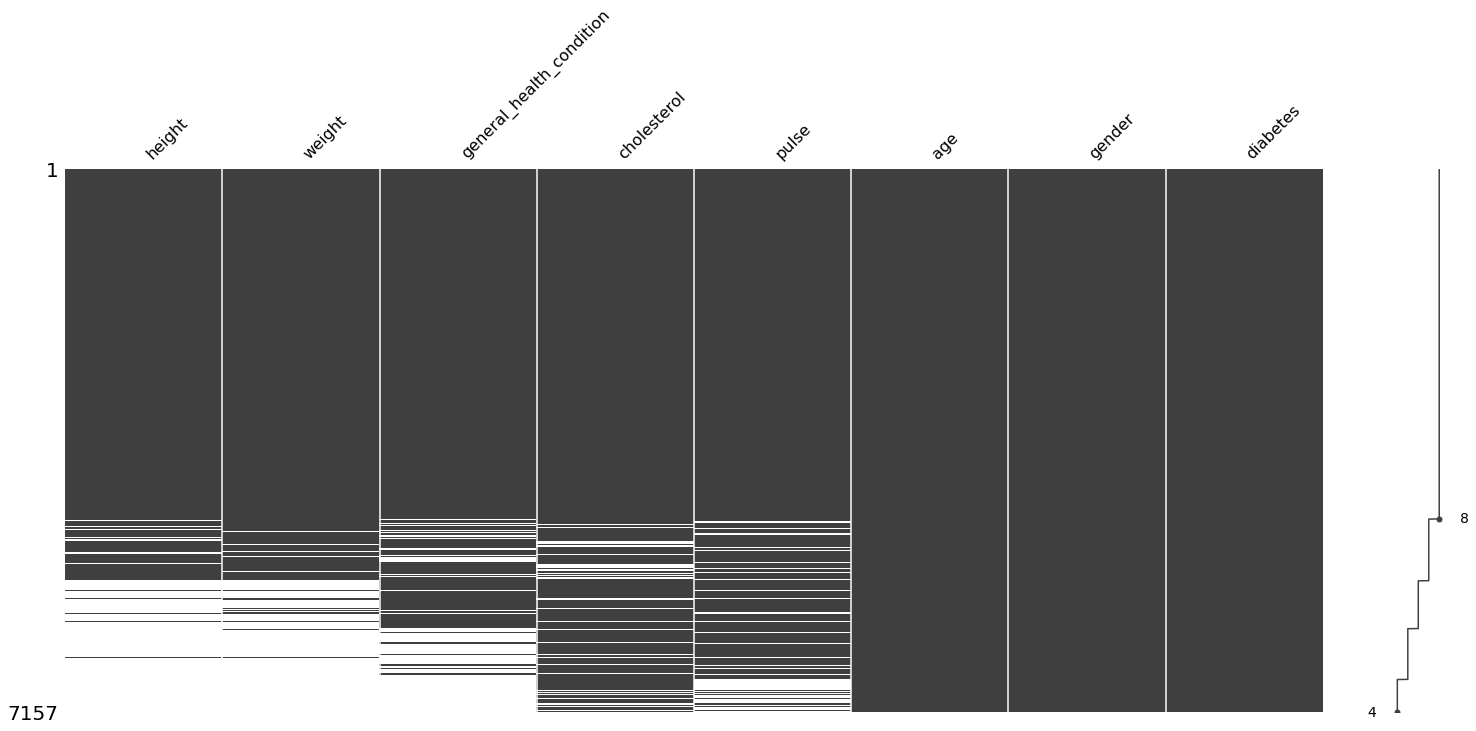

In [7]:
(
    nhanes_df
    .dropna(
        subset = ['pulse', 'cholesterol','general_health_condition','weight','height'],
        how = 'all'
    )
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix, sort='descending')   
)

## Eliminar valores faltantes

In [9]:
nhanes_df = (
    nhanes_df
    .dropna(
        subset = ['pulse', 'cholesterol','general_health_condition','weight','height'],
        how = 'all'
    )
    .missing.sort_variables_by_missingness()
)

In [10]:
nhanes_df.shape

(7157, 8)

Se han perdido 1209 puntos de datos respecto al dataset original

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bdf84ff9-f66c-44c7-a67c-ca1115a2b683' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>